# Morphological Operations Tutorial

This notebook covers:

**Basic Operations:**
1. Erosion
2. Dilation
3. Opening
4. Closing

**Applications:**
5. Boundary Extraction
6. Skeleton (Thinning)
7. Convex Hull

---

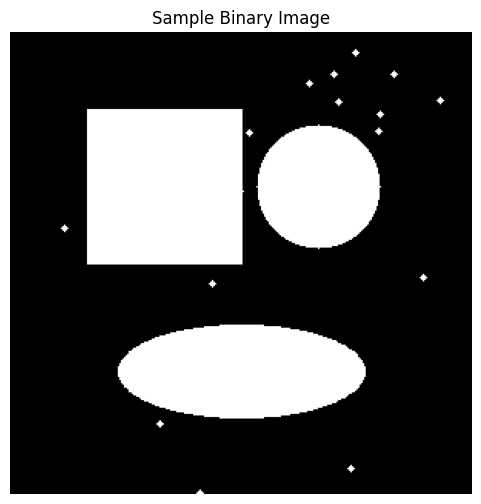

Image shape: (300, 300)
Setup complete!


In [ ]:
# SETUP CELL - Run this first!
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a sample binary image
def create_sample_image():
    img = np.zeros((300, 300), dtype=np.uint8)
    # Rectangle
    cv2.rectangle(img, (50, 50), (150, 150), 255, -1)
    # Circle
    cv2.circle(img, (200, 100), 40, 255, -1)
    # Text-like shape
    cv2.ellipse(img, (150, 220), (80, 30), 0, 0, 360, 255, -1)
    # Add some noise (small dots)
    for _ in range(20):
        x, y = np.random.randint(0, 300, 2)
        cv2.circle(img, (x, y), 2, 255, -1)
    return img

# Create sample image
image = create_sample_image()




"""image_path = "/content/drive/MyDrive/workshop 2 /Images/forest.jpg"
# Load the image using OpenCV
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE) # Read as grayscale for morphological operations

# Check if image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}")
    # Fallback to sample image if real image cannot be loaded
    image = create_sample_image()
    print("Using sample binary image instead.")
else:
    # Ensure the image is binary (0 or 255) if it's not already
    _, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
"""

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title('Sample Binary Image')
plt.axis('off')
plt.show()

print(f"Image shape: {image.shape}")
print("Setup complete!")

---
## Structuring Element (Kernel)

The **structuring element** is a small shape used to probe the image.

Common shapes:
- Rectangle
- Ellipse
- Cross

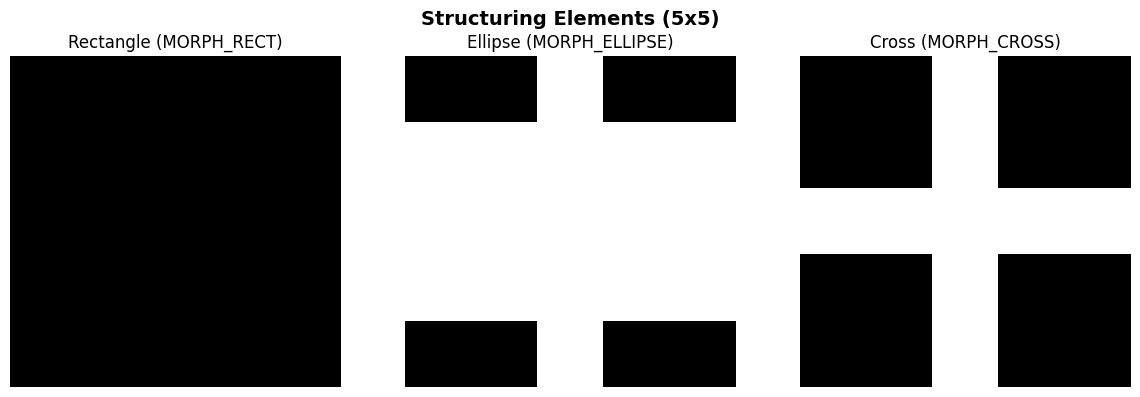

Rectangle kernel:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]

Ellipse kernel:
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]

Cross kernel:
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [ ]:
# STRUCTURING ELEMENTS

# Create different structuring elements
kernel_rect = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
kernel_cross = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Display
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(kernel_rect, cmap='gray')
ax[0].set_title('Rectangle (MORPH_RECT)')
ax[0].axis('off')

ax[1].imshow(kernel_ellipse, cmap='gray')
ax[1].set_title('Ellipse (MORPH_ELLIPSE)')
ax[1].axis('off')

ax[2].imshow(kernel_cross, cmap='gray')
ax[2].set_title('Cross (MORPH_CROSS)')
ax[2].axis('off')

plt.suptitle('Structuring Elements (5x5)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Rectangle kernel:")
print(kernel_rect)
print("\nEllipse kernel:")
print(kernel_ellipse)
print("\nCross kernel:")
print(kernel_cross)

---
## 1. Erosion

**Shrinks** the white regions (foreground).

- Removes small white noise
- Separates connected objects
- Makes objects smaller

**What it shows:** White regions shrink progressively with each iteration. The small noise dots completely disappear after 1 iteration, and the main shapes get smaller. Erosion works by keeping a pixel white ONLY if ALL pixels under the kernel are white - so edges get "eaten away."

**Parameters:**
| Parameter | Impact |
|-----------|--------|
| kernel_size | Larger = more erosion per iteration |
| iterations | More = smaller objects |

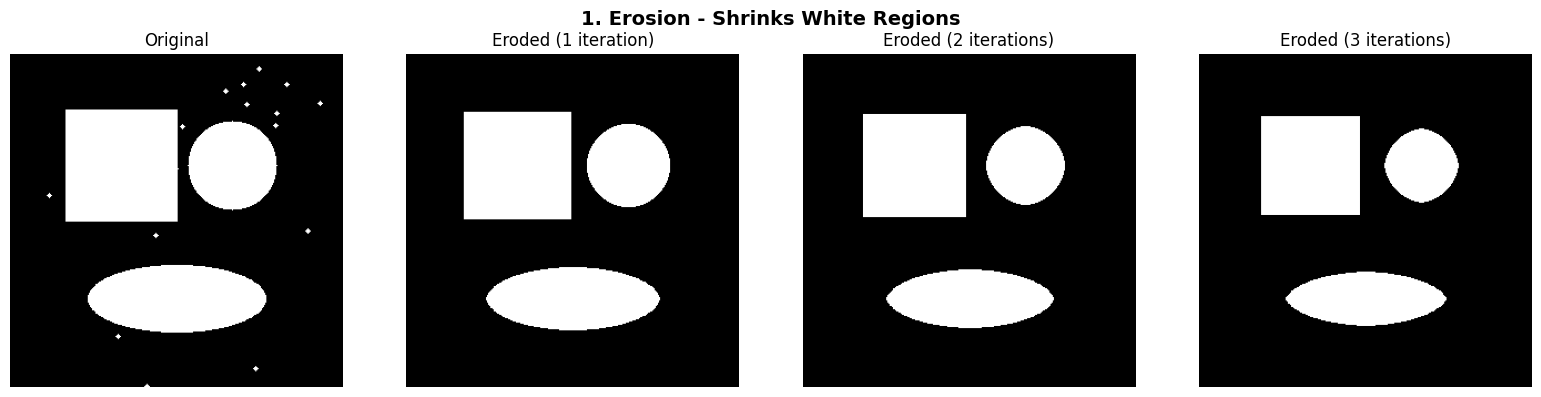

Erosion: A pixel is white ONLY if ALL pixels under the kernel are white.
Kernel size: 5x5


In [ ]:
# 1. EROSION

kernel_size = 5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

# Apply erosion
eroded = cv2.erode(image, kernel, iterations=1)

# Multiple iterations
eroded_2 = cv2.erode(image, kernel, iterations=2)
eroded_3 = cv2.erode(image, kernel, iterations=3)

# Display
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(eroded, cmap='gray')
ax[1].set_title('Eroded (1 iteration)')
ax[1].axis('off')

ax[2].imshow(eroded_2, cmap='gray')
ax[2].set_title('Eroded (2 iterations)')
ax[2].axis('off')

ax[3].imshow(eroded_3, cmap='gray')
ax[3].set_title('Eroded (3 iterations)')
ax[3].axis('off')

plt.suptitle('1. Erosion - Shrinks White Regions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Erosion: A pixel is white ONLY if ALL pixels under the kernel are white.")
print(f"Kernel size: {kernel_size}x{kernel_size}")

---
## 2. Dilation

**Expands** the white regions (foreground).

- Fills small holes
- Connects nearby objects
- Makes objects larger

**What it shows:** White regions expand progressively with each iteration. The small noise dots grow into larger spots, and main shapes get bigger until they start merging. Dilation works by making a pixel white if ANY pixel under the kernel is white - so white regions "grow outward."

**Parameters:**
| Parameter | Impact |
|-----------|--------|
| kernel_size | Larger = more expansion per iteration |
| iterations | More = larger objects, may merge |


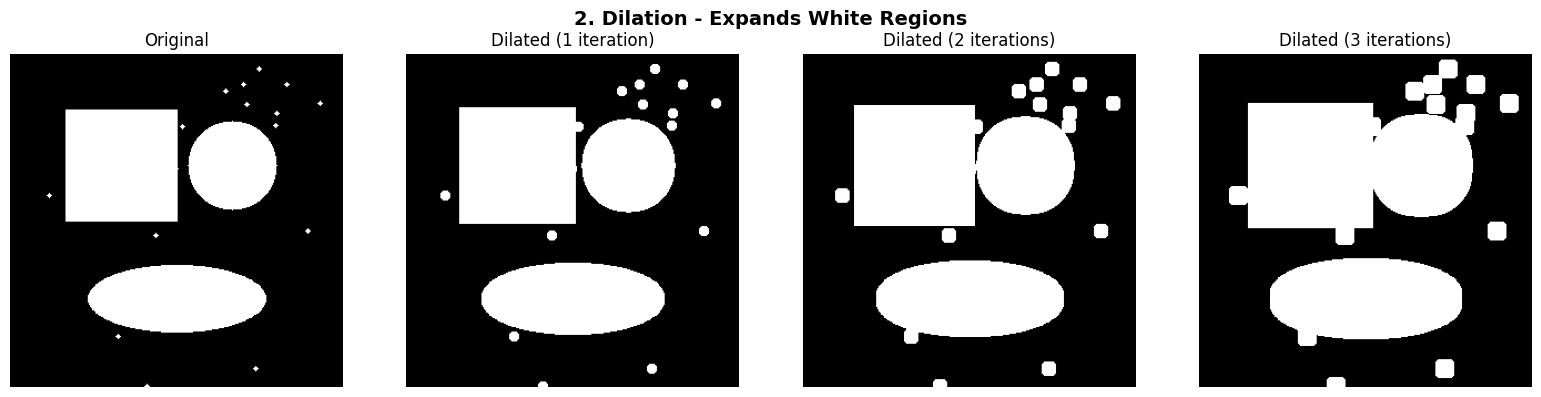

Dilation: A pixel is white if ANY pixel under the kernel is white.
Kernel size: 5x5


In [ ]:
# 2. DILATION

kernel_size = 5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

# Apply dilation
dilated = cv2.dilate(image, kernel, iterations=1)

# Multiple iterations
dilated_2 = cv2.dilate(image, kernel, iterations=2)
dilated_3 = cv2.dilate(image, kernel, iterations=3)

# Display
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(dilated, cmap='gray')
ax[1].set_title('Dilated (1 iteration)')
ax[1].axis('off')

ax[2].imshow(dilated_2, cmap='gray')
ax[2].set_title('Dilated (2 iterations)')
ax[2].axis('off')

ax[3].imshow(dilated_3, cmap='gray')
ax[3].set_title('Dilated (3 iterations)')
ax[3].axis('off')

plt.suptitle('2. Dilation - Expands White Regions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Dilation: A pixel is white if ANY pixel under the kernel is white.")
print(f"Kernel size: {kernel_size}x{kernel_size}")

- Small noise dots → **grow larger** (noise amplified!)
- Main shapes → **larger** (edges expand outward)
- More iterations → shapes start connecting/merging

---
## 3. Opening

**Erosion followed by Dilation**

Opening = Erosion → Dilation

- Removes small white noise
- Preserves object size (approximately)

**What it shows:** Small noise dots are removed while main shapes remain approximately the same size. Opening first erodes (removes noise and shrinks shapes), then dilates (restores shape size). The result: noise gone, shapes preserved.

**Parameters:**
| Parameter | Impact |
|-----------|--------|
| kernel_size | Larger = removes larger noise |

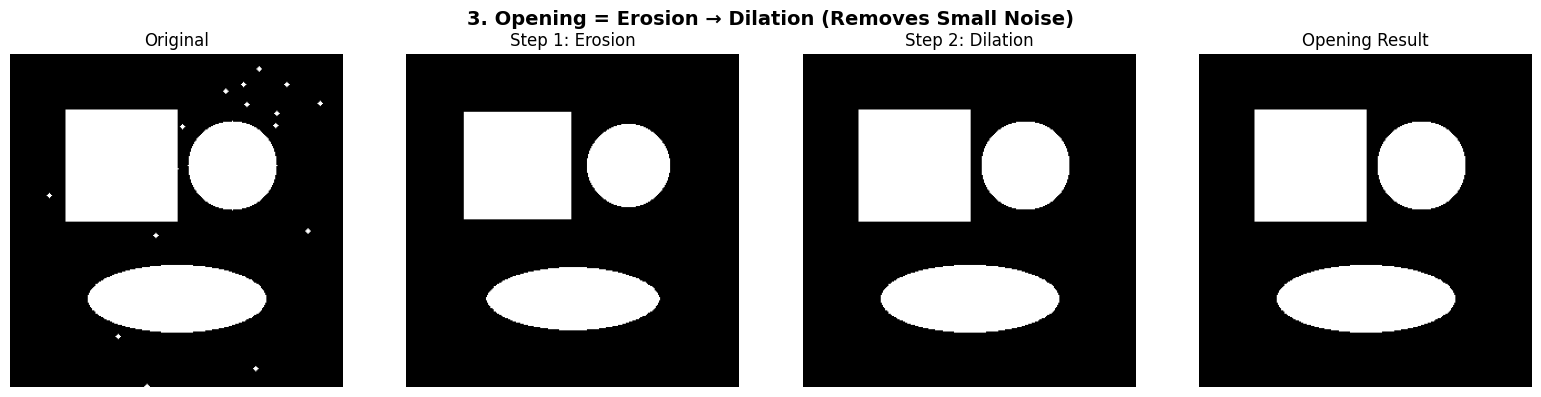

Opening: Removes small bright spots (noise) while preserving larger objects.
Formula: Opening(A) = Dilate(Erode(A))


In [ ]:
# 3. OPENING (Erosion → Dilation)

kernel_size = 5
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

# Method 1: Using morphologyEx
opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Method 2: Manual (Erosion then Dilation)
eroded = cv2.erode(image, kernel, iterations=1)
opened_manual = cv2.dilate(eroded, kernel, iterations=1)

# Display
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(eroded, cmap='gray')
ax[1].set_title('Step 1: Erosion')
ax[1].axis('off')

ax[2].imshow(opened_manual, cmap='gray')
ax[2].set_title('Step 2: Dilation')
ax[2].axis('off')

ax[3].imshow(opened, cmap='gray')
ax[3].set_title('Opening Result')
ax[3].axis('off')

plt.suptitle('3. Opening = Erosion → Dilation (Removes Small Noise)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Opening: Removes small bright spots (noise) while preserving larger objects.")
print("Formula: Opening(A) = Dilate(Erode(A))")

---
## 4. Closing

**Dilation followed by Erosion**

Closing = Dilation → Erosion

- Fills small holes
- Connects nearby objects
- Preserves object size (approximately)

**What it shows:** Small holes inside objects are filled while shapes remain approximately the same size. Note the black holes inside the rectangle and circle in the original - Closing fills them. Closing first dilates (fills holes and expands), then erodes (restores shape size).

❌Note: Closing only fills holes SMALLER than the kernel.

```cv2.circle(image_with_holes, (100, 100), 10, 0, -1)``` and ```kernel_size = 5``` is not working. Here, kernel size must be less than 10.




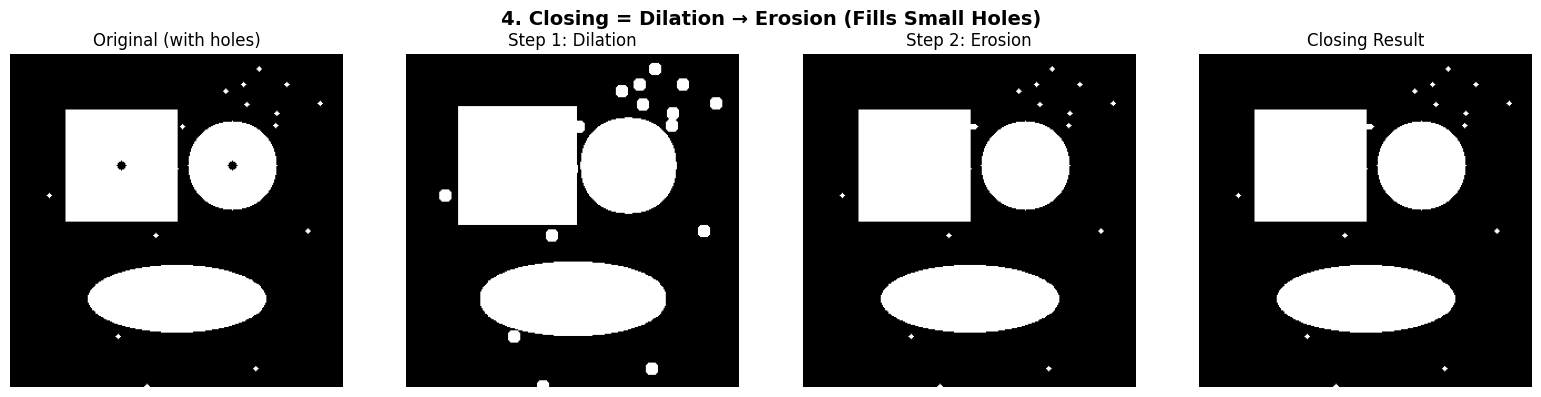

Closing: Fills small dark holes while preserving larger objects.
Formula: Closing(A) = Erode(Dilate(A))


In [ ]:
# 4. CLOSING (Dilation → Erosion)

# Create image with holes
image_with_holes = image.copy()
cv2.circle(image_with_holes, (100, 100), 4, 0, -1)  # Add hole
cv2.circle(image_with_holes, (200, 100), 4, 0, -1)   # Add hole

kernel_size = 7
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))

# Method 1: Using morphologyEx
closed = cv2.morphologyEx(image_with_holes, cv2.MORPH_CLOSE, kernel)

# Method 2: Manual (Dilation then Erosion)
dilated = cv2.dilate(image_with_holes, kernel, iterations=1)
closed_manual = cv2.erode(dilated, kernel, iterations=1)

# Display
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(image_with_holes, cmap='gray')
ax[0].set_title('Original (with holes)')
ax[0].axis('off')

ax[1].imshow(dilated, cmap='gray')
ax[1].set_title('Step 1: Dilation')
ax[1].axis('off')

ax[2].imshow(closed_manual, cmap='gray')
ax[2].set_title('Step 2: Erosion')
ax[2].axis('off')

ax[3].imshow(closed, cmap='gray')
ax[3].set_title('Closing Result')
ax[3].axis('off')

plt.suptitle('4. Closing = Dilation → Erosion (Fills Small Holes)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Closing: Fills small dark holes while preserving larger objects.")
print("Formula: Closing(A) = Erode(Dilate(A))")

---
## Comparison: All Four Basic Operations

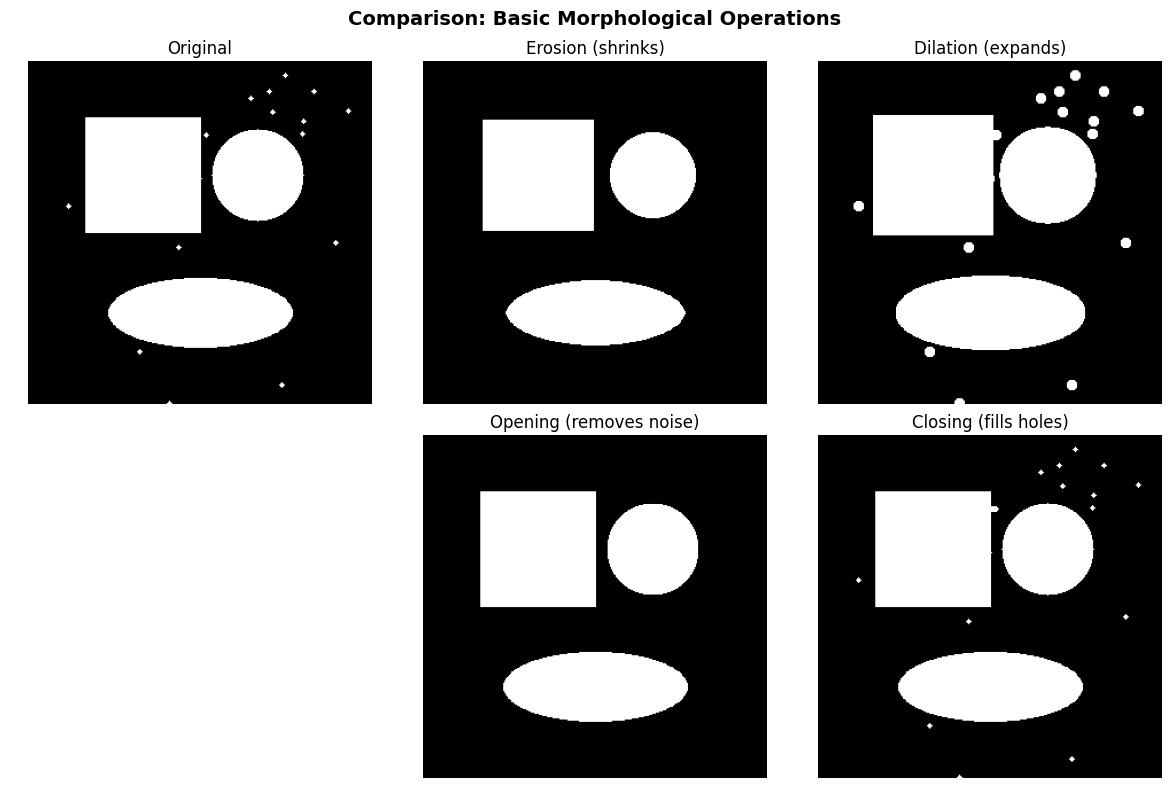

In [ ]:
# COMPARISON: All Four Operations

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

eroded = cv2.erode(image, kernel)
dilated = cv2.dilate(image, kernel)
opened = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(2, 3, figsize=(12, 8))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original')
ax[0, 0].axis('off')

ax[0, 1].imshow(eroded, cmap='gray')
ax[0, 1].set_title('Erosion (shrinks)')
ax[0, 1].axis('off')

ax[0, 2].imshow(dilated, cmap='gray')
ax[0, 2].set_title('Dilation (expands)')
ax[0, 2].axis('off')

ax[1, 0].axis('off')  # Empty

ax[1, 1].imshow(opened, cmap='gray')
ax[1, 1].set_title('Opening (removes noise)')
ax[1, 1].axis('off')

ax[1, 2].imshow(closed, cmap='gray')
ax[1, 2].set_title('Closing (fills holes)')
ax[1, 2].axis('off')

plt.suptitle('Comparison: Basic Morphological Operations', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
# Applications

---

## 5. Boundary Extraction

**Boundary = Original - Eroded**

Subtracting eroded image from original gives the boundary.

**What it shows:** Object boundaries (edges) extracted using morphological operations. The "Boundary" result shows thin edges using `Original - Eroded`. The "Gradient" result shows thicker edges using `Dilated - Eroded`. Both methods detect where objects meet the background.

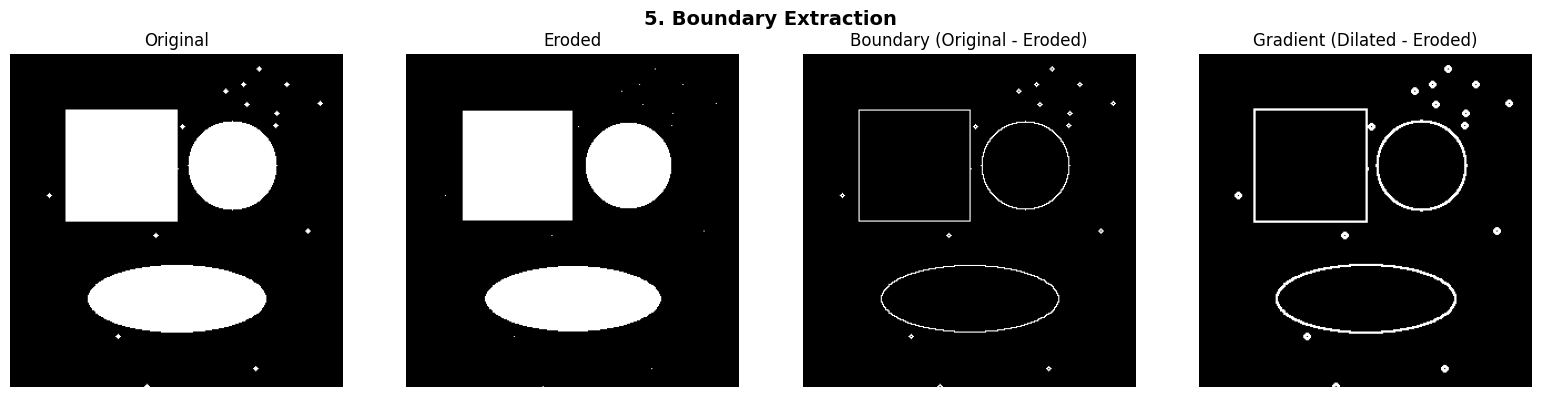

Boundary: β(A) = A - Erode(A)
Gradient: Dilate(A) - Erode(A)


In [ ]:
# 5. BOUNDARY EXTRACTION

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Method 1: Original - Eroded
eroded = cv2.erode(image, kernel)
boundary = image - eroded

# Method 2: Using morphologyEx GRADIENT
# Gradient = Dilation - Erosion (gives thicker boundary)
gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# Display
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(eroded, cmap='gray')
ax[1].set_title('Eroded')
ax[1].axis('off')

ax[2].imshow(boundary, cmap='gray')
ax[2].set_title('Boundary (Original - Eroded)')
ax[2].axis('off')

ax[3].imshow(gradient, cmap='gray')
ax[3].set_title('Gradient (Dilated - Eroded)')
ax[3].axis('off')

plt.suptitle('5. Boundary Extraction', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Boundary: β(A) = A - Erode(A)")
print("Gradient: Dilate(A) - Erode(A)")

---
## 6. Skeleton (Thinning)

Reduces objects to 1-pixel wide lines while preserving topology.

**Algorithm:** Iteratively erode and subtract until nothing remains.

**What it shows:** Objects reduced to 1-pixel wide lines that preserve the topological structure. The thick rectangle+circle shape becomes a thin "stick figure" showing the medial axis. The overlay shows the skeleton on top of the original shape (NOTE: the overlay color appears **blue**, not red as labeled).

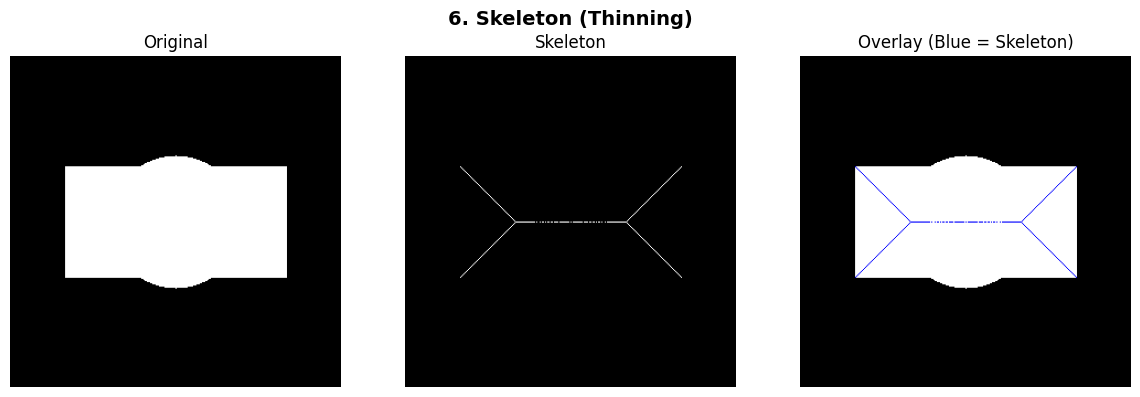

Skeleton: Reduces shape to 1-pixel wide while preserving structure.


In [ ]:
# 6. SKELETON (Manual Implementation)

def skeletonize(img):
    """Compute skeleton using morphological operations."""
    skeleton = np.zeros(img.shape, dtype=np.uint8)
    element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    temp = img.copy()
    while True:
        # Erode
        eroded = cv2.erode(temp, element)
        # Open
        opened = cv2.dilate(eroded, element)
        # Subtract: temp - opened
        subset = cv2.subtract(temp, opened)
        # Union with skeleton
        skeleton = cv2.bitwise_or(skeleton, subset)
        # Update temp
        temp = eroded.copy()

        # Stop when nothing left
        if cv2.countNonZero(temp) == 0:
            break

    return skeleton

# Create a thick shape for better skeleton demo
thick_image = np.zeros((300, 300), dtype=np.uint8)
cv2.rectangle(thick_image, (50, 100), (250, 200), 255, -1)
cv2.circle(thick_image, (150, 150), 60, 255, -1)

# Compute skeleton
skeleton = skeletonize(thick_image)

# Display
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(thick_image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap='gray')
ax[1].set_title('Skeleton')
ax[1].axis('off')

# Overlay
overlay = cv2.cvtColor(thick_image, cv2.COLOR_GRAY2BGR)
overlay[skeleton > 0] = [0, 0, 255]  # Blue skeleton
ax[2].imshow(overlay)
ax[2].set_title('Overlay (Blue = Skeleton)')
ax[2].axis('off')

plt.suptitle('6. Skeleton (Thinning)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Skeleton: Reduces shape to 1-pixel wide while preserving structure.")

### Image 1: Original
The input shape - a thick white region combining a rectangle with a circle on the right side (creating a shape like a "key" or "tag"). This is a solid filled shape with considerable thickness.

### Image 2: Skeleton
The medial axis (center line) of the shape, reduced to 1-pixel wide lines. It shows:
```
        ╲       ╱
         ╲     ╱      ← Lines going to corners
          ╲   ╱
           ╲ ╱
    ────────●────────  ← Horizontal center line
           ╱ ╲
          ╱   ╲
         ╱     ╲      ← Lines going to corners
        ╱       ╲

```
* Horizontal line → center of the rectangle part
* Diagonal lines → paths to the corners
* The pattern → represents equal distance from all edges

### Image 3: Overlay (Blue = Skeleton)
The skeleton (blue lines) drawn on top of the original shape. This shows how the skeleton sits exactly in the middle of the thick shape - like the "spine" or "backbone" of the object.

---
## 7. Convex Hull

The smallest convex shape that contains all points of the object.

Think of it as a rubber band stretched around the object.

**What it shows:** The smallest convex shape that completely contains the original object. The original has a circular hole (making it non-convex/concave). The convex hull "wraps around" the outer boundary like a rubber band, ignoring the hole. The filled hull shows the complete convex shape.


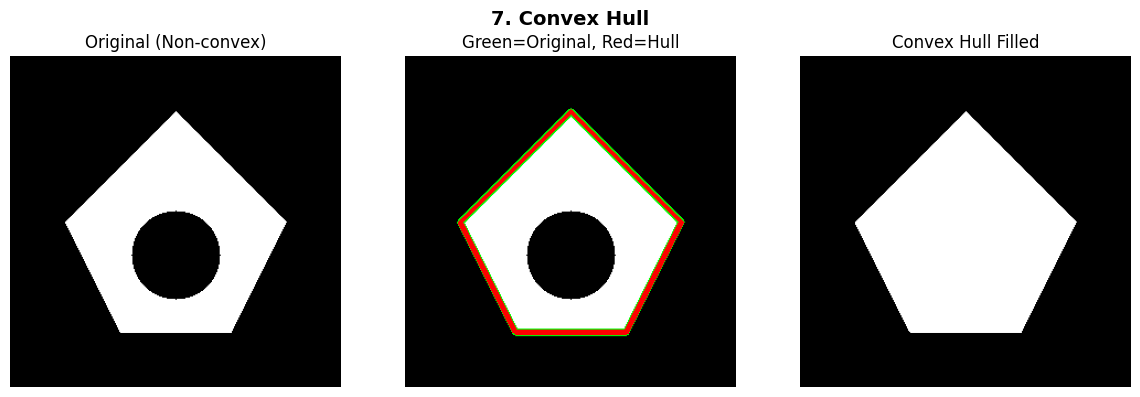

Convex Hull: Smallest convex shape containing all points.
Like a rubber band stretched around the object.


In [ ]:
# 7. CONVEX HULL

# Create an irregular shape
irregular = np.zeros((300, 300), dtype=np.uint8)
pts = np.array([[150, 50], [250, 150], [200, 250], [100, 250], [50, 150]], np.int32)
cv2.fillPoly(irregular, [pts], 255)
# Add a notch to make it non-convex
cv2.circle(irregular, (150, 180), 40, 0, -1)

# Find contours
contours, _ = cv2.findContours(irregular, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Compute convex hull
hull = cv2.convexHull(contours[0])

# Draw results
result = cv2.cvtColor(irregular, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result, [contours[0]], -1, (0, 255, 0), 5)  # Green = original
cv2.drawContours(result, [hull], -1, (0, 0, 255), 3)  # Red = hull

# Convert BGR to RGB for matplotlib display
result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

# Create filled hull
hull_filled = np.zeros((300, 300), dtype=np.uint8)
cv2.drawContours(hull_filled, [hull], -1, 255, -1)

# Display
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(irregular, cmap='gray')
ax[0].set_title('Original (Non-convex)')
ax[0].axis('off')

ax[1].imshow(result)
ax[1].set_title('Green=Original, Red=Hull')
ax[1].axis('off')

ax[2].imshow(hull_filled, cmap='gray')
ax[2].set_title('Convex Hull Filled')
ax[2].axis('off')

plt.suptitle('7. Convex Hull', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Convex Hull: Smallest convex shape containing all points.")
print("Like a rubber band stretched around the object.")

### **What is Convex Hull?**

The smallest convex shape that completely wraps around an object.
Think of it like stretching a rubber band around the object - the rubber band forms the convex hull.

**Convex vs Non-Convex:**
| Convex | Non-Convex |
|--------|------------|
| No "dents" or holes | Has "dents" or holes |

```
Convex              Non-Convex
   
    ╱╲                    ╱╲
   ╱  ╲                  ╱  ╲
  ╱    ╲                ╱ ●  ╲   ← hole/dent
 ╱______╲              ╱______╲

 ```

**What this code does:**
- Input: A shape with a hole (non-convex)
- Output: The simplest convex shape that covers it (ignores holes/dents)

```
Pentagon with hole    →    Solid Pentagon
      
       ▲                        ▲
      ╱ ╲                      ╱ ╲
     ╱ ● ╲         →          ╱   ╲
    ╱_____╲                  ╱_____╲
    
  (non-convex)              (convex hull)
```


**Use cases:** Object detection, collision detection, gesture recognition, defect detection.

---
## Additional: Top Hat and Black Hat

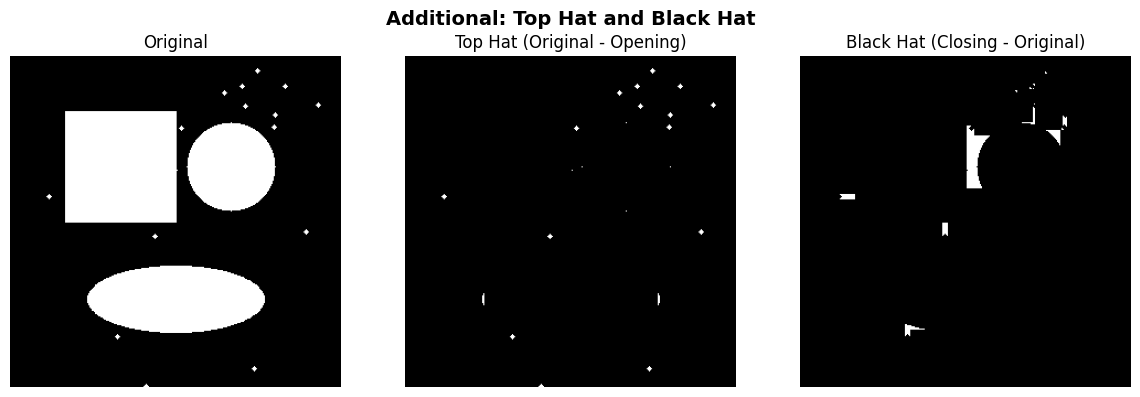

Top Hat: Extracts bright regions smaller than kernel.
Black Hat: Extracts dark regions smaller than kernel.


In [ ]:
# TOP HAT and BLACK HAT

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))

# Top Hat = Original - Opening (bright spots on dark background)
tophat = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

# Black Hat = Closing - Original (dark spots on bright background)
blackhat = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

# Display
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(tophat, cmap='gray')
ax[1].set_title('Top Hat (Original - Opening)')
ax[1].axis('off')

ax[2].imshow(blackhat, cmap='gray')
ax[2].set_title('Black Hat (Closing - Original)')
ax[2].axis('off')

plt.suptitle('Additional: Top Hat and Black Hat', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Top Hat: Extracts bright regions smaller than kernel.")
print("Black Hat: Extracts dark regions smaller than kernel.")